In [40]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as pl
from matplotlib import rc
from matplotlib.pylab import rcParams
import matplotlib.ticker as mtick
from matplotlib.ticker import LogLocator
import seaborn as sb
import os
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
# Let's setup graphics:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=False)
fontSize = 16
sb.set_style('dark')
rcParams['ytick.labelsize'] = fontSize
rcParams['xtick.labelsize'] = fontSize

In [5]:
# Prepare to manipulate data
bands2check = ['412','443','490','510','555','670']
rngDict = {'412':(4e-3,40),'443':(4e-3,40),'490':(4e-3,40),'510':(4e-3,40),
           '555':(4e-3,40),'670':(4e-3,40)}
figRows,figCols = 3,2
reshBands = np.reshape(bands2check,(figRows,figCols))
#rrsUncStd358Dict = dict.fromkeys(bands2check)
#rrsUncStd229Dict = dict.fromkeys(bands2check)
#rrsPercUncStd358Dict = dict.fromkeys(bands2check)
#rrsPercUncStd229Dict = dict.fromkeys(bands2check)
mainDir = '/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/DATA/L2_L3/FullScale/CentralPacific/'
fpStd358 = mainDir + 'S1999358223554/Standard/S1999358223554_silent.L2'
fpStd229 = mainDir + 'S1999229224418/Standard/S1999229224418_silent.L2'

In [6]:
def DataUncLoader(fp,bands,getLt=True):
    '''function to populate dictionaries'''
    rrsPercUncDict = dict.fromkeys(bands)
    rrsUncDict = dict.fromkeys(bands)
    ltDict = dict.fromkeys(bands)
    with nc.Dataset(fp) as ds:
        gv = ds.groups['geophysical_data'].variables
        for band in bands2check:
            arr = gv['Rrs_unc_' + band][:]
            arr2 = arr / gv['Rrs_'+ band][:]
            applyMask = arr2.mask
            arr = np.ma.array(arr.data,mask=applyMask)
            rrsPercUncDict[band] = arr2.compressed()
            rrsUncDict[band] = arr.compressed()
            if getLt:
                arr3 = gv['Lt_' + band][:]
                arr3 = np.ma.array(arr3,mask=applyMask)
                ltDict[band] = arr3.compressed()
    return rrsUncDict,rrsPercUncDict,ltDict

In [7]:
# Populate Uncertainty Dictionaries
rrsUncStd229Dict,rrsPercUncStd229Dict,lt229Dict = DataUncLoader(fpStd229,bands2check,
                                                                getLt=True)

In [8]:
rrsUncStd358Dict,rrsPercUncStd358Dict,lt358Dict = DataUncLoader(fpStd358,bands2check,getLt=True)

0.0893138 77381.4
0.0305814 40.5502
PercOK: 24.48%


(array([  9.63400000e+03,   2.29290000e+04,   2.26720000e+04,
          2.03300000e+04,   2.05720000e+04,   2.02670000e+04,
          1.87000000e+04,   1.63870000e+04,   1.48540000e+04,
          1.20290000e+04,   1.07270000e+04,   8.94900000e+03,
          7.72700000e+03,   6.38600000e+03,   5.71000000e+03,
          5.01600000e+03,   3.38700000e+03,   3.78900000e+03,
          2.80300000e+03,   2.48900000e+03,   2.13900000e+03,
          1.80700000e+03,   1.59300000e+03,   1.19200000e+03,
          1.17300000e+03,   1.35700000e+03,   8.95000000e+02,
          9.07000000e+02,   6.47000000e+02,   7.42000000e+02,
          6.14000000e+02,   5.81000000e+02,   4.39000000e+02,
          4.14000000e+02,   5.42000000e+02,   2.92000000e+02,
          4.31000000e+02,   2.56000000e+02,   4.30000000e+02,
          2.31000000e+02,   2.88000000e+02,   2.99000000e+02,
          1.87000000e+02,   3.04000000e+02,   2.20000000e+02,
          1.02000000e+02,   4.02000000e+02,   1.58000000e+02,
        

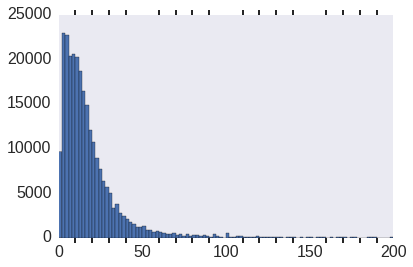

In [199]:
band = '670'
xdata = rrsPercUncStd229Dict[band]*100
ydata = lt229Dict[band]

thresh=10
print(xdata[xdata>0].min(),xdata.max())
print(ydata.min(),ydata.max())
print('PercOK: %.2f%%' % (xdata[xdata<=5].size / xdata.size * 100))
pl.hist(xdata,bins=100,range=(0,200));
#pl.xscale('log');

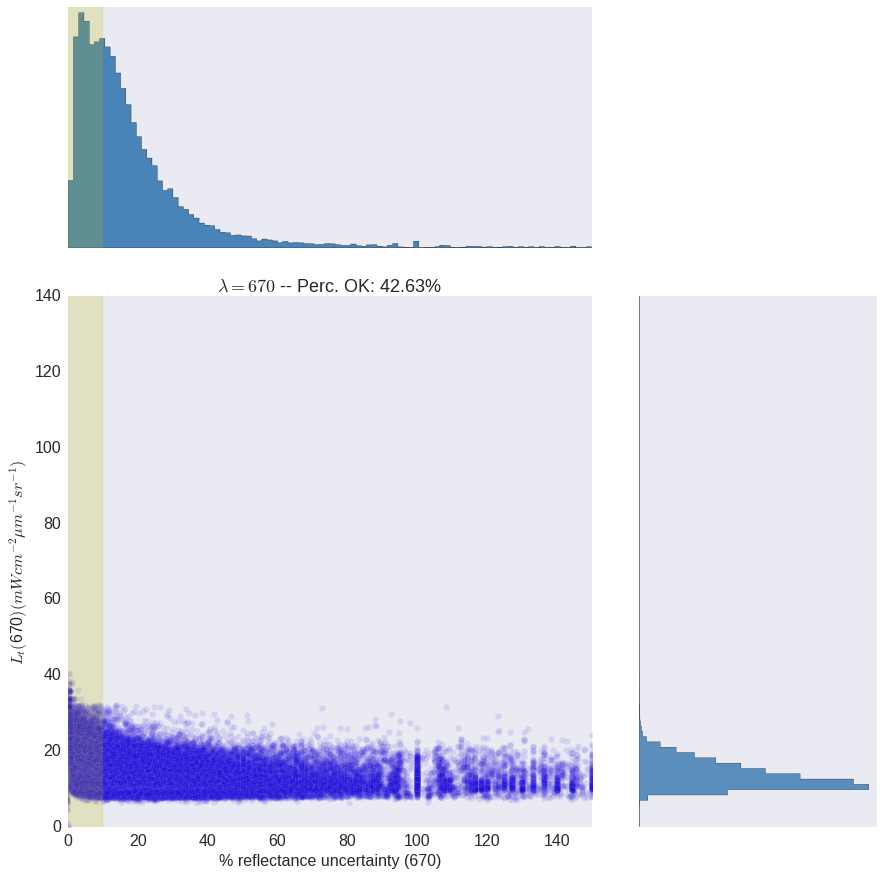

In [239]:
## NEAD TO WRITE A FUNCTION TO SHADE DATA WITHIN THRESHOLD
#def JointPlot(xdata,ydata,band,absolute=True)
band = '670'
yrange=(0,140)
absolute = False
ydata = lt229Dict[band]

colors=sb.xkcd_rgb

rngDict={'412':(2.5e-5,0.025),'443':(2.5e-5,0.025),'490':(2.5e-5,0.025),
        '510':(2.5e-5,0.025),'555':(2.5e-5,0.025),'670':(2.5e-5,0.025)}
percRngDict={'412':(0,20),'443':(0,10),'490':(0,10),
            '510':(0,10),'555':(0,20),'670':(0,150)}
rrsUncTreshDict = {'412':0.001,'443':0.001,'490':0.001,
                 '510':0.001,'555':0.001,'670':0.002}
rrsPercThreshDict = {'412':5,'443':5,'490':5,
                 '510':5,'555':5,'670':10}

if absolute:
    minorLocator = LogLocator(subs=np.arange(2,11)/10)
    rcParams['xtick.minor.visible'] = True
    rcParams['xtick.minor.size'] = 5
    rcParams['xtick.minor.width'] = 2
    rcParams['xtick.direction'] = 'Down'
    xdata = rrsUncStd229Dict[band] * np.pi
    thresh = rrsUncTreshDict[band]
    rrsRng = rngDict[band]
    logBins = np.logspace(np.log10(rrsRng[0]),np.log10(rrsRng[1]),100)
    usebins = logBins
    scl='log'
    savename = 'JointAbs' + band
    xlabel1=r'$\rho_w($' + band + r'$)$'
else:
    rcParams['xtick.minor.visible'] = True
    xdata = rrsPercUncStd229Dict[band] * 100
    thresh = rrsPercThreshDict[band]
    rrsRng=percRngDict[band]
    usebins=100
    scl='linear'
    savename = 'JointPerc' + band
    xlabel2= '% reflectance uncertainty (' + band + ')' 
percOK = 100*xdata[xdata<thresh].size/xdata.size

g1 = sb.JointGrid(x=xdata,y=ydata,
                 ratio=2,xlim=rrsRng,ylim=yrange,size=12)
_ = g1.plot_joint(pl.scatter,s=40,edgecolor='w',alpha=0.1,color=colors['ultramarine blue'])
g1.ax_joint.axvspan(xmin=rrsRng[0],xmax=thresh,color='y',alpha=0.2)
g1.ax_joint.xaxis.grid(True,which='minor')
if absolute:
    g1.ax_joint.xaxis.set_minor_locator(minorLocator)
g1.ax_joint.set_xscale(scl)
pl.title('$\lambda = %s$ -- Perc. OK: %.2f%%' % (band, percOK),fontsize=fontSize + 2)
_ = g1.ax_marg_x.hist(xdata,bins=usebins,range=rrsRng,
                      histtype='stepfilled',color=colors['cool blue'])
_ = g1.ax_marg_y.hist(ydata,bins=100,range=yrange,alpha=0.9,
                      orientation='horizontal',histtype='stepfilled',
                     color=colors['cool blue'])
g1.ax_marg_x.set_xscale(scl)
g1.ax_marg_x.xaxis.grid(True,which='minor')
if absolute:
    g1.ax_marg_x.xaxis.set_minor_locator(minorLocator)
ylabel=r'$L_t($' + band + r'$) (mW cm^{-2} \mu m^{-1} sr^{-1})$'
g1.ax_marg_x.axvspan(xmin=rrsRng[0],xmax=thresh,color='y',alpha=0.2);
if absolute: 
    xlbl=xlabel1
else:
    xlbl=xlabel2
g1.set_axis_labels(xlabel=xlbl,ylabel=ylabel,fontsize=fontSize)

g1.savefig('./PACEREVIEWFIGS/' + savename,format='png')
del g1